<a href="https://colab.research.google.com/github/Rafli-Putra/Pemrograman_Python/blob/main/Tugas_Absensi_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Nilai Pathloss.
def cos(f,ta,ht,hr,d):
  #f = frekuensi (MHz)
  #tipe = urban, suburban, open
  #tt = tinggi tower (meter)
  #tu = tinggi user (meter)
  #d = jarak (meter)

    if f in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif f in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if ta=='urban' :
        Cm=0
    elif ta=='suburban' :
        Cm= -2*((np.log10((f/28)**2))-5.4)
    elif ta=='open' :
        Cm= -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(f)-0.7)*hr-(1.56*np.log10(f)-1.8)
    Lp = Ca+(Cb*np.log10(f))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

#Nilai daya terima
def Recieve (ptx,Lp, gtx, grx):
  prx = 10*np.log10(ptx) - Lp + gtx + grx
  
  return 10**(prx/10)

#Nilai SNR
def SNR (bw, prx):
  no = -174 + 10*np.log10(bw)
  no1 = 10**(no/10)
  
  return prx/no1

#Nilai Kapasitas
def kapasitas (bw, snr):
  ks= bw * np.log2(1+snr)

  return ks

In [14]:
#Data
f = [700, 900, 1800]
tipe = ['urban','suburban', 'open']
tt = 80 #m
tu = 1.5 #m
jarakmax = 1000 #m
jarakmin = 300 #m
x = 200 #titik
d = np.random.randint(jarakmin, jarakmax, x)
d = d[np.argsort(d)]
ptx = 30 #watt
gtx = 10 #db
grx = 2 #db
bw = 5000000 #Hz

In [15]:
#1800 hz
lp1 = []
prx1 = []
snr1 = []
ks1 = []
for i in range(3):
  lp1.append(cos(f[2], tipe[i], tt, tu, d))

  prx1.append(Recieve(ptx, lp1[i], gtx, grx))
  prx_sort = prx1[i]
  prx1[i] = prx_sort[np.argsort(d)]

  snr1.append(SNR(bw, prx1[i]))
  snr_sort = snr1[i]
  snr1[i]= snr_sort[np.argsort(d)]

  ks1.append(kapasitas(bw, snr1[i]))
  ks_sort = ks1[i]
  ks1[i]= ks_sort[np.argsort(d)]

In [16]:
#tipe urban
lp2 = []
prx2 = []
snr2 = []
ks2 = []
for i in range(3):
  lp2.append(cos(f[i], tipe[0], tt, tu, d))

  prx2.append(Recieve(ptx, lp2[i], gtx, grx))
  prx_sort1 = prx2[i]
  prx2[i] = prx_sort1[np.argsort(d)]

  snr2.append(SNR(bw, prx2[i]))
  snr_sort1 = snr2[i]
  snr2[i]= snr_sort1[np.argsort(d)]

  ks2.append(kapasitas
             (bw, snr2[i]))
  ks_sort1 = ks2[i]
  ks2[i]= ks_sort1[np.argsort(d)]

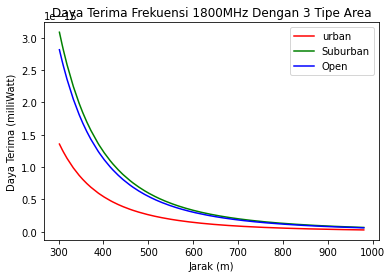

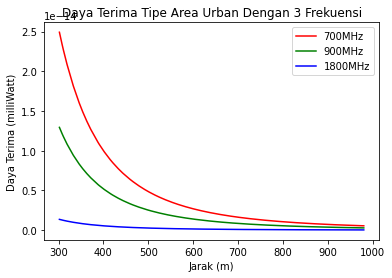

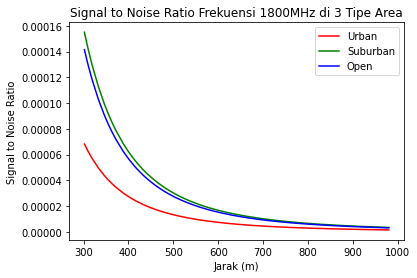

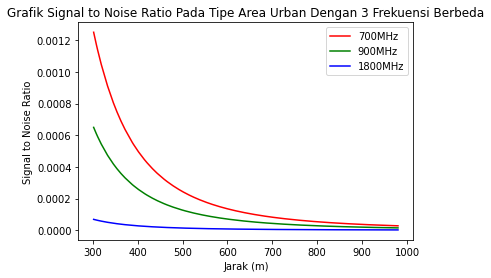

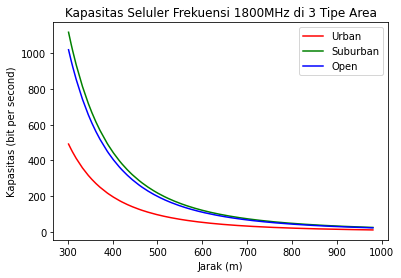

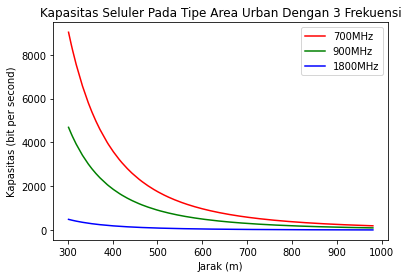

In [18]:
#Daya terima frekuensi 1800MHz di 3 tipe area
plt.plot(d, prx1[0], 'r')
plt.plot(d, prx1[1], 'g')
plt.plot(d, prx1[2], 'b')
plt.title('Daya Terima Frekuensi 1800MHz Dengan 3 Tipe Area')
plt.ylabel('Daya Terima (milliWatt)')
plt.xlabel('Jarak (m)')
plt.legend(['urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#Daya terima tipe area urban dengan 3 frekuensi
plt.plot(d, prx2[0], 'r')
plt.plot(d, prx2[1], 'g')
plt.plot(d, prx2[2], 'b')
plt.title('Daya Terima Tipe Area Urban Dengan 3 Frekuensi')
plt.ylabel('Daya Terima (milliWatt)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()

#Signal to noise ratio frekuensi 1800MHz di 3 tipe area
plt.plot(d, snr1[0], 'r')
plt.plot(d, snr1[1], 'g')
plt.plot(d, snr1[2], 'b')
plt.title('Signal to Noise Ratio Frekuensi 1800MHz di 3 Tipe Area')
plt.ylabel('Signal to Noise Ratio')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#Signal to ratio di tipe are urban dengan 3 frekuensi
plt.plot(d, snr2[0], 'r')
plt.plot(d, snr2[1], 'g')
plt.plot(d, snr2[2], 'b')
plt.title('Grafik Signal to Noise Ratio Pada Tipe Area Urban Dengan 3 Frekuensi Berbeda')
plt.ylabel('Signal to Noise Ratio')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()

#Kapasitas seluler frekuensi 1800MHz di 3 tipe area
plt.plot(d, ks1[0], 'r')
plt.plot(d, ks1[1], 'g')
plt.plot(d, ks1[2], 'b')
plt.title('Kapasitas Seluler Frekuensi 1800MHz di 3 Tipe Area')
plt.ylabel('Kapasitas (bit per second)')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#Kapasistas seluler tipe area urban dengan 3 frekuensi
plt.plot(d, ks2[0], 'r')
plt.plot(d, ks2[1], 'g')
plt.plot(d, ks2[2], 'b')
plt.title('Kapasitas Seluler Pada Tipe Area Urban Dengan 3 Frekuensi')
plt.ylabel('Kapasitas (bit per second)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()